# Capstone Webscrapping using BeautifulSoup

In finance, an exchange rate is the rate at which one currency will be exchanged for another. It is also regarded as the value of one country's currency in relation to another currency. In this project we will be looking at the movements of IDR/USD exchange rate.

First, let's request the web from the site with `get` command.

In [45]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

In [46]:
url_get.content[1:888]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />\n<link rel="dns-prefetch" href="https://ajax.googleapis.com/" />\r\n<link rel="dns-prefetch" href="https://www.go'

Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But we’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [47]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is still the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse let's slice it so that we only see the first 1000 character.

In [48]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront


To find the key, right click on the table and inspect. Our key is usually not far upwards from `<tbody>`. In this case, the key is `<table class="table table-striped table-hover table-hover-solid-row table-simple history-data">`.

In [49]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-26-2020">
     14,090.70769
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-26-2020">
     USD IDR rate for 11/26/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/25/2020
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/R


Now let's take a peek at the first two data. From the output above, we can see that `tr` "wraps" our data for us.

In [50]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>,
 <tr><td>11/25/2020</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/11-25-2020">14,136.09929</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-25-2020">USD IDR rate for 11/25/2020</a></td></tr>]

Now, let's start scraping the data. We need to create a loop that will "draw" the data we want from the sea of objects.

In [51]:
temp = []

for i in range(0, len(tr)):
    row = table.find_all('tr')[i]
    
    TANGGAL = row.find_all('td')[0].text
    TANGGAL = TANGGAL.strip()
    
    HARI = row.find_all('td')[1].text
    HARI = HARI.strip()
    
    KURS = row.find_all('td')[2].text
    KURS = KURS.strip()
    
    NOTES = row.find_all('td')[3].text
    NOTES = NOTES.strip()
    
    temp.append((TANGGAL,HARI,KURS))
    
temp

[('11/26/2020', 'Thursday', '14,090.70769 IDR'),
 ('11/25/2020', 'Wednesday', '14,136.09929 IDR'),
 ('11/24/2020', 'Tuesday', '14,137.48161 IDR'),
 ('11/23/2020', 'Monday', '14,185.57119 IDR'),
 ('11/20/2020', 'Friday', '14,162.60519 IDR'),
 ('11/19/2020', 'Thursday', '14,165.50144 IDR'),
 ('11/18/2020', 'Wednesday', '14,051.29503 IDR'),
 ('11/17/2020', 'Tuesday', '14,040.16051 IDR'),
 ('11/16/2020', 'Monday', '14,085.69501 IDR'),
 ('11/13/2020', 'Friday', '14,142.77143 IDR'),
 ('11/12/2020', 'Thursday', '14,141.24303 IDR'),
 ('11/11/2020', 'Wednesday', '14,073.46024 IDR'),
 ('11/10/2020', 'Tuesday', '14,053.76135 IDR'),
 ('11/9/2020', 'Monday', '14,283.29667 IDR'),
 ('11/6/2020', 'Friday', '14,214.49744 IDR'),
 ('11/5/2020', 'Thursday', '14,389.14027 IDR'),
 ('11/4/2020', 'Wednesday', '14,544.44634 IDR'),
 ('11/3/2020', 'Tuesday', '14,589.01774 IDR'),
 ('11/2/2020', 'Monday', '14,612.89990 IDR'),
 ('10/30/2020', 'Friday', '14,629.16216 IDR'),
 ('10/29/2020', 'Thursday', '14,701.62361 

Don't forget to reverse the order of the data.

In [52]:
temp = temp[::-1]
temp

[('5/31/2020', 'Sunday', '14,664.14584 IDR'),
 ('6/1/2020', 'Monday', '14,586.73900 IDR'),
 ('6/2/2020', 'Tuesday', '14,382.27395 IDR'),
 ('6/3/2020', 'Wednesday', '14,060.78946 IDR'),
 ('6/4/2020', 'Thursday', '14,113.82802 IDR'),
 ('6/5/2020', 'Friday', '14,305.96407 IDR'),
 ('6/7/2020', 'Sunday', '13,989.39489 IDR'),
 ('6/8/2020', 'Monday', '13,867.95377 IDR'),
 ('6/9/2020', 'Tuesday', '13,870.75718 IDR'),
 ('6/10/2020', 'Wednesday', '13,976.91611 IDR'),
 ('6/11/2020', 'Thursday', '13,966.85142 IDR'),
 ('6/12/2020', 'Friday', '14,121.55442 IDR'),
 ('6/14/2020', 'Sunday', '14,145.23543 IDR'),
 ('6/15/2020', 'Monday', '14,021.62200 IDR'),
 ('6/16/2020', 'Tuesday', '14,046.73959 IDR'),
 ('6/17/2020', 'Wednesday', '14,120.02241 IDR'),
 ('6/18/2020', 'Thursday', '14,095.36729 IDR'),
 ('6/19/2020', 'Friday', '14,077.63950 IDR'),
 ('6/21/2020', 'Sunday', '14,068.55627 IDR'),
 ('6/22/2020', 'Monday', '14,136.05128 IDR'),
 ('6/23/2020', 'Tuesday', '14,148.27391 IDR'),
 ('6/24/2020', 'Wednesd

Put these data array into a dataframe.

In [62]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('TANGGAL','HARI','KURS'))
df.head()

,TANGGAL,HARI,KURS
0,5/31/2020,Sunday,"14,664.14584 IDR"
1,6/1/2020,Monday,"14,586.73900 IDR"
2,6/2/2020,Tuesday,"14,382.27395 IDR"
3,6/3/2020,Wednesday,"14,060.78946 IDR"
4,6/4/2020,Thursday,"14,113.82802 IDR"


Set "TANGGAL" to be the index for this data frame.

In [54]:
df = df.set_index('TANGGAL')

In [55]:
df.dtypes

HARI    object
KURS    object
dtype: object

Now, let's convert "KURS" to a more suitable data type: float. Don't forget to delete the comma and "IDR".

In [56]:
df['KURS'] = df['KURS'].str.replace(",","")
df['KURS'] = df['KURS'].str.replace(" IDR","")
df['KURS'] = df['KURS'].astype('float64')

We're ready to plot the data. Since we're dealing with information that changes over time, line graphs are the most suitable.

<AxesSubplot:xlabel='TANGGAL'>

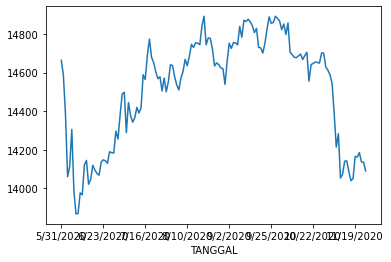

In [59]:
df['KURS'].plot.line()

Finally, we can discern from the plot above that during the last 6 months, the exchange rate fluctuate heavily. It drops sharply right off the bat before climbing steadily back up to the level it was. It is relatively stable at 14,700 IDR/USD before once again plunging back into 14,100 IDR/USD.

Flask Dashboard: http://127.0.0.1:5000/